In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Softmax,Flatten
import os
import cv2


## importing Dataset

Datadir="D:\imp docs\sem3\project\Implementation\imp1\model cnn"
Categories = ["1","2","3","4","5","6","7","8","9","0","unknown"]

In [4]:
import pickle

In [5]:
pickle_in = open("X.pickle" , "rb")
X = pickle.load(pickle_in)



In [6]:
pickle_on = open("Y.pickle" ,"rb")
Y= pickle.load(pickle_on)

# splitting the dataset

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train_orig , X_test_orig ,Y_train ,Y_test = train_test_split(X,Y,test_size = 0.30)

In [9]:
Y_train = np.array(Y_train)

In [10]:
Y_test  = np.array(Y_test)

In [11]:
Y_train.shape

(10500,)

In [12]:
Y_test.shape

(4500,)

In [13]:
X_train_orig.shape

(10500, 70, 70, 1)

In [14]:
X_test_orig.shape

(4500, 70, 70, 1)

# setting number of total training and test size

In [15]:
m_train = X_train_orig.shape[0]
m_test = X_test_orig.shape[0]
num_px = X_train_orig.shape[1]

In [16]:
print("number of trianing examples : m_train = {}".format(m_train))
print("numver of test examples : m_test = {}".format(m_test))
print("dimensions of each images is  : (num_px,num_px) = ({},{})".format(num_px,num_px))

number of trianing examples : m_train = 10500
numver of test examples : m_test = 4500
dimensions of each images is  : (num_px,num_px) = (70,70)


In [17]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.

In [18]:
X_train[0,5]

array([[0.49019608],
       [0.49019608],
       [0.49019608],
       [0.49019608],
       [0.47843137],
       [0.48627451],
       [0.47843137],
       [0.4627451 ],
       [0.47058824],
       [0.45882353],
       [0.44705882],
       [0.44705882],
       [0.4745098 ],
       [0.47058824],
       [0.44313725],
       [0.44705882],
       [0.44705882],
       [0.45882353],
       [0.45882353],
       [0.45490196],
       [0.44313725],
       [0.44705882],
       [0.44705882],
       [0.45490196],
       [0.52156863],
       [0.55294118],
       [0.55686275],
       [0.56470588],
       [0.56078431],
       [0.56862745],
       [0.56862745],
       [0.56862745],
       [0.56470588],
       [0.56470588],
       [0.56470588],
       [0.56470588],
       [0.56078431],
       [0.56078431],
       [0.55294118],
       [0.54901961],
       [0.54509804],
       [0.54117647],
       [0.51764706],
       [0.46666667],
       [0.40784314],
       [0.38431373],
       [0.38039216],
       [0.384

# building network


In [57]:
# def get_model(input_shape):
#     model=Sequential()
#     model.add(Flatten(input_shape = input_shape))
#     model.add(Dense(200,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer = "Zeros",activation ="sigmoid",input_shape = input_shape,name = "hidden_layer_1"))
#     model.add(Dense(200,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros", activation = "sigmoid",name = "hidden_layer_2"))
#     model.add(Dense(120,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros",activation ="relu",name ="hidden_relu_layer_1"))
#     model.add(Dense(75,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros",activation = "sigmoid",name = "hidden_layer_3"))
#     model.add(Dense(50,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros",activation ="relu",name= "hidden_Relu_2"))
#     model.add(Dense(10,kernel_initializer = tf.keras.initializers.RandomNormal(mean =0.0,stddev = 0.05),bias_initializer ="Zeros",activation ="softmax",name = "output_layer"))
#     return model

In [58]:
# def get_model(input_shape):
#     model=Sequential()
#     model.add(Flatten(input_shape = input_shape))
#     model.add(Dense(200,activation ="sigmoid",input_shape = input_shape,name = "hidden_layer_1"))
#     model.add(Dense(200, activation = "sigmoid",name = "hidden_layer_2"))
#     model.add(Dense(120,activation ="relu",name ="hidden_relu_layer_1"))
#     model.add(Dense(75,activation = "sigmoid",name = "hidden_layer_3"))
#     model.add(Dense(50,activation ="relu",name= "hidden_Relu_2"))
#     model.add(Dense(10,activation ="softmax",name = "output_layer"))
#     return model

In [ ]:
def get_model(input_shape):
    


In [59]:
model = get_model(X_train[0].shape)

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 4900)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 200)               980200    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 200)               40200     
_________________________________________________________________
hidden_relu_layer_1 (Dense)  (None, 120)               24120     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 75)                9075      
_________________________________________________________________
hidden_Relu_2 (Dense)        (None, 50)                3800      
_________________________________________________________________
output_layer (Dense)         (None, 10)               

# compile model

In [61]:
def compile_model(model):
    model.compile(
    optimizer =tf.keras.optimizers.SGD(learning_rate= 0.001,momentum =0.0,nesterov =False),
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
        
    
    
    
    
    )

In [62]:
compile_model(model)

# fit the model to the training data

In [63]:
def train_model (model, scaled_train_img,train_labels):
    history = model.fit(scaled_train_img,train_labels,epochs= 100,verbose = 2)
    return history

In [64]:
history = train_model(model,X_train,Y_train)

Epoch 1/100
329/329 - 1s - loss: 2.3770 - accuracy: 0.0967
Epoch 2/100
329/329 - 1s - loss: 2.3213 - accuracy: 0.0966
Epoch 3/100
329/329 - 1s - loss: 2.3111 - accuracy: 0.0966
Epoch 4/100
329/329 - 1s - loss: 2.3073 - accuracy: 0.0965
Epoch 5/100


KeyboardInterrupt: 

# plotting curvers

In [111]:
frame =pd.DataFrame(history.history)






[Text(0.5, 0, 'epochs '), Text(0, 0.5, 'accuracy')]

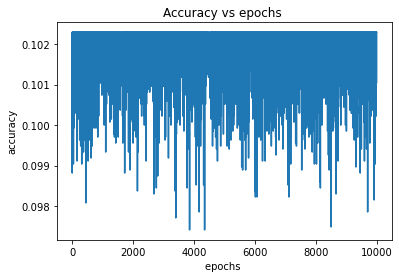

In [112]:
acc_plot = frame.plot(y="accuracy" ,title = "Accuracy vs epochs ", legend =False)
acc_plot.set(xlabel = "epochs " , ylabel ="accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

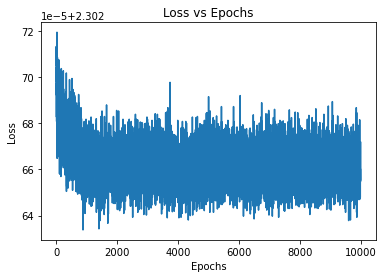

In [113]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

# evaluate the model

In [114]:
def evaluate_model(model,scaled_test_img , test_labels):
    test_loss, test_accuracy  = model.evaluate (scaled_test_img ,test_labels)
    return test_loss,test_accuracy

In [115]:
test_loss,test_accuracy = evaluate_model(model,X_test ,Y_test)

47/47 [==============================] - 0s 1ms/step - loss: 2.3035 - accuracy: 0.0793


# model prediction

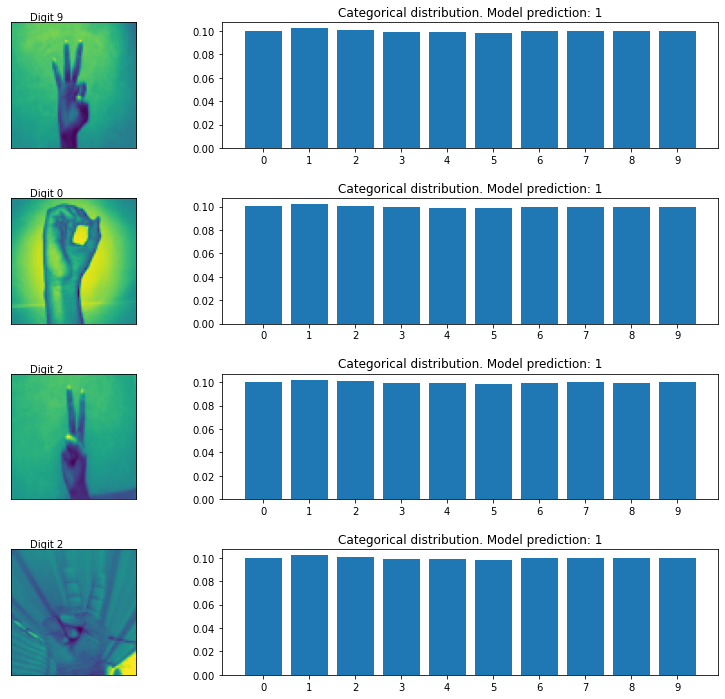

In [116]:
num_test_images = X_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = X_test[random_inx, ...]
random_test_labels = Y_test[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()